## Part 1: Data Cleaning
In the new table 'data_train' created in SQL, we ensure:
1. no NULL value in id
2. loan_grade only contain 1 CHARACTER as alphabets are used for grading system
3. cb_person_default_on_file only contain 1 CHARACTER as Y = Yes, N = No
4. no Null value in loan_status as we need the status for training
We also checked that:
1. No NULL value in any cell
2. No duplicate id
3. Loan status are only equal to 0 or 1

In Part 1, we aim to check other columns. All the data should be reasonable and with correct data type.

In [34]:
#import libraries
import csv
import pandas as pd
import numpy as np

In [35]:
#read 'data_train' csv file
df = pd.read_csv('/Users/jasmine/Desktop/python/p10_loan/data_train.csv')

In [36]:
#show the first 5 rows
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,N,3,0


In [37]:
#Show simple statistics
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [38]:
#Show data type
df.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length               int64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

All the columns are in correct datatype.

**1. Person Age**

We can see that the maximum value in person_age is "123" in simple statistics, which doesn't make sense. 
The oldest person in the world was 116 years old. As 123 > 116, we dropped the row with person_age = "123".

In [39]:
#Show the row which qualified person_age = 123
df[df['person_age'] == 123]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7,PERSONAL,B,6700,10.75,0.18,N,4,0


In [40]:
#Drop the row with person_age = 123
df.drop( df[df['person_age'] == 123].index , inplace = True )

In [41]:
#Check the value counts in column person_home_ownership, loan_intent, loan_grade and cb_person_default_on_file
check_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 
                'cb_person_default_on_file']

for col in check_columns:
    unique_counts = df[col].value_counts().sort_values(ascending = False).reset_index()
    unique_counts.columns = [col, 'Counts']
    
    display(unique_counts.style.set_table_styles(
        [{'selector': 'th, td', 'props': [('border', '1px solid black')]}]).hide_index())

/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_22856/3232504559.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(unique_counts.style.set_table_styles(


person_home_ownership,Counts
RENT,30594
MORTGAGE,24823
OWN,3138
OTHER,89


/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_22856/3232504559.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(unique_counts.style.set_table_styles(


loan_intent,Counts
EDUCATION,12271
MEDICAL,10934
PERSONAL,10015
VENTURE,10011
DEBTCONSOLIDATION,9133
HOMEIMPROVEMENT,6280


/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_22856/3232504559.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(unique_counts.style.set_table_styles(


loan_grade,Counts
A,20984
B,20399
C,11036
D,5034
E,1009
F,149
G,33


/var/folders/s_/kyxg26h93yl6vrsnk_8341xc0000gn/T/ipykernel_22856/3232504559.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  display(unique_counts.style.set_table_styles(


cb_person_default_on_file,Counts
N,49942
Y,8702


No uncommon issue is found.

**2. Employment length**

Check if employment length in years > age. Employment length should not be greater than person age.

In [42]:
#Find the row with person_emp_length greater than person_age
df_emp_vs_age = df[df['person_emp_length'] > df['person_age']]
display(df_emp_vs_age)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123,MEDICAL,D,25000,15.95,0.35,Y,6,1
49252,49252,21,192000,MORTGAGE,123,VENTURE,B,20000,11.49,0.10,N,2,0


In [43]:
#Drop the corresponding row
df.drop([41079,49252], inplace=True)
df[df['person_emp_length'] > df['person_age']]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


**3.Person credit history length**

Now check the difference between cb_person_cred_hist_length against person_age. 
It does not make sense when a person under 16 has credit history. Therefore, we delete the rows where cb_person_cred_hist_length > person_age - 16.

In [44]:
#Find the row with cb_person_cred_hist_length greater than person_age - 16
df_cred_vs_age = df[df['cb_person_cred_hist_length'] > df['person_age'] -16]
display(df_cred_vs_age)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
2214,2214,21,45432,MORTGAGE,3,PERSONAL,B,10000,9.88,0.22,N,7,0
11996,11996,31,117516,MORTGAGE,3,MEDICAL,C,21000,13.49,0.18,N,24,0
12924,12924,24,70000,RENT,7,EDUCATION,D,12000,16.77,0.17,Y,16,0
15953,15953,22,24449,OWN,2,VENTURE,B,1800,11.89,0.07,N,10,0
21827,21827,28,186480,MORTGAGE,2,PERSONAL,A,10000,5.42,0.05,N,29,0
21992,21992,21,83000,RENT,0,MEDICAL,C,3000,11.97,0.04,N,10,0
23483,23483,23,48756,RENT,2,PERSONAL,B,4800,11.36,0.10,N,8,0
26941,26941,27,63844,RENT,3,DEBTCONSOLIDATION,A,20000,6.54,0.31,N,12,0
29507,29507,21,45000,RENT,5,EDUCATION,C,8000,12.84,0.18,N,10,0
33644,33644,23,44000,RENT,5,MEDICAL,G,19000,19.82,0.43,Y,8,1


In [45]:
#Drop the corresponding row
df = df[~df.isin(df_cred_vs_age.to_dict(orient='list')).all(axis=1)]
#Sample check if the data is dropped
df[df['id']== '2214']

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


Check any duplicate id

In [46]:
df[df.duplicated('id')]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status


Get the indicator variables of the specific columns so we can use categorical variables for regression analysis.

In [47]:
dummy = pd.get_dummies(df[['person_home_ownership','loan_intent',
                                    'loan_grade','cb_person_default_on_file']])
dummy

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
58641,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
58642,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
58643,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [48]:
dummy = dummy.astype('float64')
dummy.dtypes

person_home_ownership_MORTGAGE    float64
person_home_ownership_OTHER       float64
person_home_ownership_OWN         float64
person_home_ownership_RENT        float64
loan_intent_DEBTCONSOLIDATION     float64
loan_intent_EDUCATION             float64
loan_intent_HOMEIMPROVEMENT       float64
loan_intent_MEDICAL               float64
loan_intent_PERSONAL              float64
loan_intent_VENTURE               float64
loan_grade_A                      float64
loan_grade_B                      float64
loan_grade_C                      float64
loan_grade_D                      float64
loan_grade_E                      float64
loan_grade_F                      float64
loan_grade_G                      float64
cb_person_default_on_file_N       float64
cb_person_default_on_file_Y       float64
dtype: object

In [49]:
#Concatenate the dummy variables with original DataFrame
df_1 = pd.concat([df, dummy], axis=1)
#Display new DataFrame
df_1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,37,35000,RENT,0,EDUCATION,B,6000,11.49,0.17,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,22,56000,OWN,6,MEDICAL,C,4000,13.35,0.07,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,29,28800,OWN,8,PERSONAL,A,6000,8.90,0.21,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,30,70000,RENT,14,VENTURE,B,12000,11.11,0.17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,22,60000,RENT,2,MEDICAL,A,6000,6.92,0.10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
#Export dataframe to CSV for EDA 
df_1.to_csv('data_train_2.csv', index=False)

## Part 2: Data Exploration

From the dashboard in Tableau, we can see that Loan Grade D to F have a higher accept loan rate than Loan Grade A to C, which is not as expected. Interestingly, the average person income for Loan Grade D was less than the other grades (except Grade G).
We would like to inspect data with Loan Grade D.

In [51]:
df_gradeD = df_1[(df_1['loan_grade']=='D') & (df_1['loan_status']==1)]
df_gradeD

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
24,24,22,30000,RENT,3,MEDICAL,D,5000,16.49,0.17,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
39,39,22,32000,RENT,6,EDUCATION,D,8000,15.58,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
68,68,31,62900,MORTGAGE,2,MEDICAL,D,18000,14.09,0.24,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
85,85,30,74000,MORTGAGE,14,DEBTCONSOLIDATION,D,7000,15.62,0.09,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
98,98,29,34000,RENT,9,HOMEIMPROVEMENT,D,3000,16.32,0.08,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58592,58592,27,67000,RENT,0,DEBTCONSOLIDATION,D,25000,14.96,0.37,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58626,58626,26,53000,RENT,10,PERSONAL,D,10800,16.29,0.20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58628,58628,26,54000,RENT,4,PERSONAL,D,1600,14.96,0.03,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58638,58638,29,46610,MORTGAGE,1,PERSONAL,D,2600,17.58,0.05,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [52]:
df_gradeD_loan_intent = df_gradeD['loan_intent'].value_counts().to_frame()
df_gradeD_loan_intent.rename(columns={'loan_intent':'value_counts'},inplace=True)
df_gradeD_loan_intent

,value_counts
DEBTCONSOLIDATION,788
MEDICAL,779
PERSONAL,420
HOMEIMPROVEMENT,358
VENTURE,323
EDUCATION,319


It was found that debt consolidation and medical might be more likely to apply loan successfully.

We should also check the percentage of loan per income to see if Grade D applies for a smaller proportion of loan.

**Data Correlations**

In [53]:
#Look at the correlations in the DataFrame
df_1[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate',
      'loan_percent_income','loan_status']].corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,loan_status
person_age,1.000000,0.102624,0.123740,0.050637,0.009751,-0.032088,-0.000999
person_income,0.102624,1.000000,0.164981,0.310943,-0.057521,-0.280293,-0.169921
person_emp_length,0.123740,0.164981,1.000000,0.090991,-0.104569,-0.067668,-0.103063
loan_amnt,0.050637,0.310943,0.090991,1.000000,0.113512,0.647215,0.144798
loan_int_rate,0.009751,-0.057521,-0.104569,0.113512,1.000000,0.152090,0.338899
loan_percent_income,-0.032088,-0.280293,-0.067668,0.647215,0.152090,1.000000,0.378073
loan_status,-0.000999,-0.169921,-0.103063,0.144798,0.338899,0.378073,1.000000


## Part 3: Machine Learning Prediction

In [54]:
#Import libraries for Machine Learning
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Import classification models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
#Import xgboost
import xgboost as xgb

Define a function to plot confussion matrix.

In [55]:
def plot_confusion_matrix(y,y_predict):
    'a function to plot confussion matrix'
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y,y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1'])

In [56]:
#Prepare training and testing data; X - independent variables, Y - dependent variable (loan_status)
Y = df_1['loan_status']
Y = Y.values
X = df_1.drop(columns={'id','loan_status','person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'})

In [57]:
#Check if there is any null value in X and Y
X.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [58]:
print(Y)

[0 0 0 ... 1 0 0]


In [59]:
#Standardise the data X then reassign it to the variable X using transformation
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 1.56952701, -0.76575913, -1.20465676, ..., -0.02336945,
         0.41738575, -0.41738575],
       [-0.92187879, -0.21207244,  0.33405286, ..., -0.02336945,
         0.41738575, -0.41738575],
       [ 0.24077725, -0.92922854,  0.84695607, ..., -0.02336945,
         0.41738575, -0.41738575],
       ...,
       [-0.75578507, -0.52846484,  0.59050447, ..., -0.02336945,
         0.41738575, -0.41738575],
       [-0.92187879, -0.8975893 , -0.69175355, ..., -0.02336945,
         0.41738575, -0.41738575],
       [ 0.57296469,  0.28888219, -0.69175355, ..., -0.02336945,
         0.41738575, -0.41738575]])

In [60]:
#Split data into 80% training data and 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)


In [61]:
print(f'Y train sample size: {Y_train.shape}')
print(f'Y test sample size: {Y_test.shape}')

Y train sample size: (46900,)
Y test sample size: (11726,)


### LOGISTIC REGRESSION

In [77]:
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
#Create a logistic regression object
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [78]:
predlr = logreg_cv.predict(X_test)

In [79]:
print('Best parameters:', logreg_cv.best_params_)
#accuracy on validation data
print('accuracy on validation data:',logreg_cv.best_score_)
#accuracy score on the test data
logreg_acc = logreg_cv.score(X_test,Y_test)
print('score:', logreg_acc)

Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy on validation data: 0.9118763326226013
score: 0.9122462902950708


In [80]:
print(classification_report(Y_test,predlr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10016
           1       0.78      0.55      0.65      1710

    accuracy                           0.91     11726
   macro avg       0.86      0.76      0.80     11726
weighted avg       0.91      0.91      0.91     11726



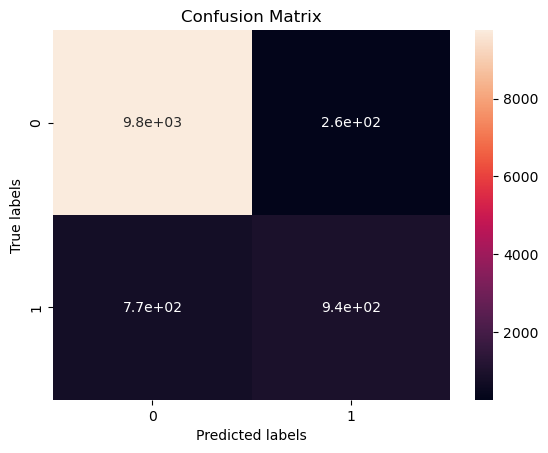

In [81]:
plot_confusion_matrix(Y_test,predlr)

### DECISION TREE

In [82]:
#Create a dictionary to find the best parameters from the dictionary
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#create object of DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [83]:
appTree = GridSearchCV(tree,parameters,cv=10)
#fit data
appTree.fit(X_train, Y_train)
#make prediction on testing dataset
predTree = appTree.predict(X_test)

In [84]:
print('Best parameters:', appTree.best_params_)
tree_acc = metrics.accuracy_score(Y_test,predTree)
print("DecisionTree's Accuracy:", tree_acc)

Best parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
DecisionTree's Accuracy: 0.9417533685826369


In [85]:
print(classification_report(Y_test,predTree))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10016
           1       0.90      0.68      0.77      1710

    accuracy                           0.94     11726
   macro avg       0.92      0.83      0.87     11726
weighted avg       0.94      0.94      0.94     11726



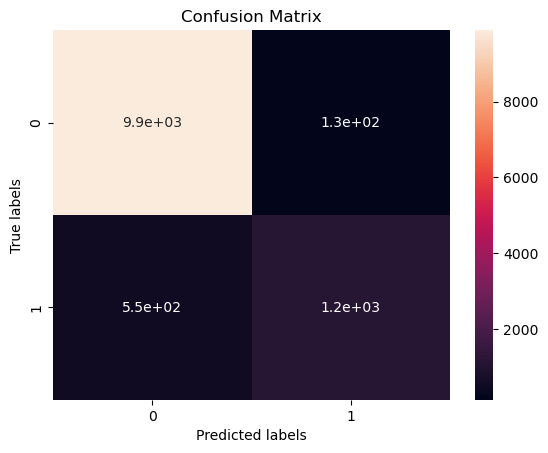

In [86]:
#plot confusion matrix
plot_confusion_matrix(Y_test,predTree)

## XGBoost

In [70]:
# Import the classifier
from xgboost import XGBClassifier
#Create a dictionary of parameters
parameters = {
'objective':['binary:logistic'],
'learning_rate':[0.01,0.1,0.2],
'max_depth':[4,6,8],
'n_estimators':[50,100,150],
'random_state':[42]
}
# Define the model
xgboost = XGBClassifier()

In [72]:
appBoost = GridSearchCV(xgboost,parameters,cv=5)
#fit data
appBoost.fit(X_train, Y_train)
#make prediction on testing dataset
predBoost = appBoost.predict(X_test)

In [74]:
print('Best parameters:', appBoost.best_params_)
#accuracy on validation data
print('Accuracy on validation data:',appBoost.best_score_)
#accuracy score on the test data
Boost_acc = appBoost.score(X_test,Y_test)
print('score:', Boost_acc)

Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42}
Accuracy on validation data: 0.9521748400852879
score: 0.9536073682415146


In [75]:
print(classification_report(Y_test,predBoost))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10016
           1       0.93      0.74      0.82      1710

    accuracy                           0.95     11726
   macro avg       0.94      0.86      0.90     11726
weighted avg       0.95      0.95      0.95     11726



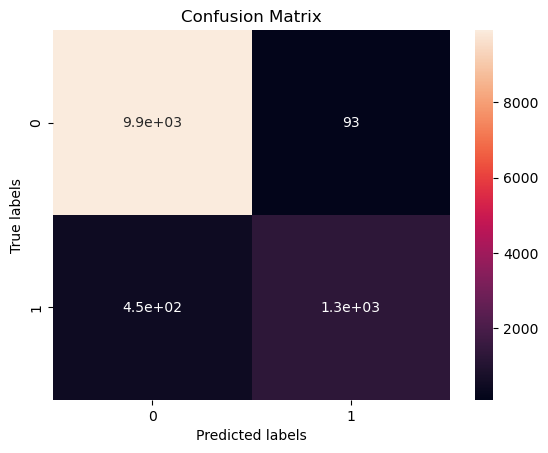

In [76]:
#plot confusion matrix
plot_confusion_matrix(Y_test,predBoost)

## Evaluate the models

In [92]:
#import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
#A list of predicted values
yhat_list = [predTree,predlr,predBoost]

#f1_score list
roc_auc_scores = []
for element in yhat_list:
    roc_auc = roc_auc_score(Y_test,element,average='weighted')
    roc_auc_scores.append(roc_auc)

#accuracy score list
accuracy_scores = []
for element in yhat_list:
    accuracy_s = accuracy_score(Y_test,element)
    accuracy_scores.append(accuracy_s)

#store in dataframe
scores = pd.DataFrame(np.array([roc_auc_scores, accuracy_scores]),
                     index=['AUC-ROC score','Accuracy'],
                     columns=['Tree','LogReg','XGBoost'])
scores

,Tree,LogReg,XGBoost
AUC-ROC score,0.832299,0.761440,0.863486
Accuracy,0.941753,0.912246,0.953607


### Output Predictions to Test Dataset

In [93]:
df_test = pd.read_csv('/Users/jasmine/Desktop/python/p10_loan/data_test.csv')

In [94]:
dummy_test = pd.get_dummies(df_test[['person_home_ownership','loan_intent',
                                    'loan_grade','cb_person_default_on_file']])
dummy_test.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [95]:
#dummy_test = dummy.astype('float64')
#dummy_test.dtypes

In [96]:
#Concatenate the dummy variables with original DataFrame
df_test_1 = pd.concat([df_test, dummy_test], axis=1)
#Display new DataFrame
df_test_1.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,...,0,0,0,0,0,0,1,0,1,0
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,...,0,0,0,1,0,0,0,0,0,1
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,...,1,0,0,0,0,1,0,0,0,1
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,...,0,1,0,0,0,0,0,0,1,0
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,...,0,0,0,0,1,0,0,0,0,1


In [97]:
rows_with_nan = df_test_1[df_test_1.isnull().any(axis=1)]
rows_with_nan

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y


In [98]:
#Prepare independent variables of submission dataset

X_submission = df_test_1.drop(columns={'id','person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'})

In [99]:
#Check if there is any null value in X_submission
X_submission.isnull().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [100]:
#Standardise the data X then reassign it to the variable X using transformation
from sklearn.preprocessing import StandardScaler
X_submission = StandardScaler().fit(X_submission).transform(X_submission.astype(float))
X_submission

array([[-0.75700653,  0.13014081, -0.43612143, ..., -0.02146145,
         0.42034944, -0.42034944],
       [-0.25971541,  0.8415031 ,  0.33940391, ..., -0.02146145,
        -2.37897307,  2.37897307],
       [-0.25971541, -0.8973825 ,  0.08089546, ..., -0.02146145,
        -2.37897307,  2.37897307],
       ...,
       [ 3.88437726, -0.10697995, -1.21164676, ..., -0.02146145,
         0.42034944, -0.42034944],
       [-0.92277024, -0.73930199, -0.17761298, ..., -0.02146145,
        -2.37897307,  2.37897307],
       [ 0.56910312, -0.50218123,  0.33940391, ..., -0.02146145,
         0.42034944, -0.42034944]])

In [101]:
prediction_submission = appBoost.predict_proba(X_submission)

In [102]:
df_pred_sub = pd.DataFrame(prediction_submission)
df_pred_sub.head()

,0,1
0,0.067217,0.932783
1,0.982417,0.017583
2,0.466581,0.533419
3,0.934553,0.065447
4,0.923727,0.076273


In [103]:
submission = pd.DataFrame({'id':df_test['id'], 'loan_status':df_pred_sub[1]})
submission.head()

,id,loan_status
0,58645,0.932783
1,58646,0.017583
2,58647,0.533419
3,58648,0.065447
4,58649,0.076273


In [104]:
submission.dtypes

id               int64
loan_status    float32
dtype: object

In [105]:
submission.to_csv('submission.csv', index=False)